# Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Transformation

In [4]:
# Read description dataset and assign it to the variable d
d = pd.read_csv("description.csv", encoding="latin_1")
print(d.shape)
d.head()

(122, 3)


,book_id,name,description
0,4833,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...


In [5]:
# Drops all rows that has NaN value
d.dropna(inplace=True)

In [6]:
# print shape of the description dataset
d.shape

(122, 3)

In [8]:
# Read listing dataset and assign it to the variable l
l = pd.read_csv('listing.csv', encoding="latin_1")
print(l.shape)
l.head()

(1089, 4)


,book_id,genre,name,author
0,4833,Biographies & Memoirs,The Glass Castle,Jeannette Walls
1,590,Biographies & Memoirs,"Night (The Night Trilogy, #1)",Elie Wiesel
2,4264,Biographies & Memoirs,"Angela's Ashes (Frank McCourt, #1)",Frank McCourt
3,3361,Biographies & Memoirs,"Eat, Pray, Love",Elizabeth Gilbert
4,4535,Biographies & Memoirs,Into Thin Air: A Personal Account of the Mount...,Jon Krakauer


In [9]:
# Drops duplicates rows that has the column 'book_id'
l.drop_duplicates('book_id', inplace=True)

In [10]:
# Merge the dataset description (d) and listing (l) on the columns 'book_id' and 'name'
df = pd.merge(d,
              l,
              on=['book_id', 'name'], 
              how='left')
df.shape

(122, 5)

In [11]:
# print shape of concatenated dataset
df.shape

(122, 5)

In [12]:
# Reset index for the dataset (df)
df.reset_index(inplace=True)

In [13]:
# Print the dataset
df.head()

,index,book_id,name,description,genre,author
0,0,4833,The Glass Castle,"A tender, moving tale of unconditional love in...",Biographies & Memoirs,Jeannette Walls
1,1,590,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi...",Biographies & Memoirs,Elie Wiesel
2,2,4264,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...,Biographies & Memoirs,Frank McCourt
3,3,3361,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an...",Biographies & Memoirs,Elizabeth Gilbert
4,4,4535,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...,Biographies & Memoirs,Jon Krakauer


In [14]:
# Read books dataset and assign it to the variable b
b = pd.read_csv('books.csv')
print(b.shape)
b.head()

(2312, 5)


,book_id,avg_rating,no_of_ratings,user_id,user_rating
0,4833,4.25,7156.0,3466,0
1,590,4.31,7821.0,3466,5
2,4264,4.08,3836.0,3453,5
3,3361,3.52,1245.0,3453,4
4,4535,4.13,3107.0,3453,0


In [15]:
# Check if there is any Null cell in the book dataset
b.isnull().sum()

book_id          0
avg_rating       2
no_of_ratings    2
user_id          0
user_rating      0
dtype: int64

In [16]:
# Check if there is any Null cell in the book dataset
b.isnull().sum()

book_id          0
avg_rating       2
no_of_ratings    2
user_id          0
user_rating      0
dtype: int64

In [17]:
# Print the unique number of books in the dataset book
len(b.book_id.unique())

710

In [18]:
# Drop the colunms 'user_rating' and 'user_id'
b.drop(['user_rating', 'user_id'], axis=1, inplace=True)

In [19]:
# Drops all duplicate rows
b.drop_duplicates(inplace = True)
b.head()

,book_id,avg_rating,no_of_ratings
0,4833,4.25,7156.0
1,590,4.31,7821.0
2,4264,4.08,3836.0
3,3361,3.52,1245.0
4,4535,4.13,3107.0


In [20]:
# Reset index for the book dataset (b)
b.reset_index(drop=True, inplace=True)

In [21]:
# Print the unique number of books in the dataset book
len(b.book_id.unique())

710

In [22]:
# Print concatenated dataset
df.head()

,index,book_id,name,description,genre,author
0,0,4833,The Glass Castle,"A tender, moving tale of unconditional love in...",Biographies & Memoirs,Jeannette Walls
1,1,590,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi...",Biographies & Memoirs,Elie Wiesel
2,2,4264,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...,Biographies & Memoirs,Frank McCourt
3,3,3361,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an...",Biographies & Memoirs,Elizabeth Gilbert
4,4,4535,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...,Biographies & Memoirs,Jon Krakauer


In [23]:
# Print book dataset
b.head()

,book_id,avg_rating,no_of_ratings
0,4833,4.25,7156.0
1,590,4.31,7821.0
2,4264,4.08,3836.0
3,3361,3.52,1245.0
4,4535,4.13,3107.0


In [24]:
# Print shape of concatenated dataset
df.shape

(122, 6)

In [25]:
# Merge previous concatenated dataset (description and listing) with book dataset
df = pd.merge(df,
                 b[['book_id', 'avg_rating', 'no_of_ratings']],
                 on='book_id', 
                 how='left')
df.shape

(122, 8)

In [26]:
df.isnull().sum()

index             0
book_id           0
name              0
description       0
genre             0
author            7
avg_rating       20
no_of_ratings    20
dtype: int64

In [27]:
df.head()

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings
0,0,4833,The Glass Castle,"A tender, moving tale of unconditional love in...",Biographies & Memoirs,Jeannette Walls,4.25,7156.0
1,1,590,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi...",Biographies & Memoirs,Elie Wiesel,4.31,7821.0
2,2,4264,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...,Biographies & Memoirs,Frank McCourt,4.08,3836.0
3,3,3361,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an...",Biographies & Memoirs,Elizabeth Gilbert,3.52,1245.0
4,4,4535,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...,Biographies & Memoirs,Jon Krakauer,4.13,3107.0


# Text Preprocessing

In [28]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [ ]:
df['description'] = df['description'].astype(str)

In [ ]:
df['cleaned'] = df['description'].apply(_removeNonAscii)

df['cleaned'] = df.cleaned.apply(func = make_lower_case)
df['cleaned'] = df.cleaned.apply(func = remove_stop_words)
df['cleaned'] = df.cleaned.apply(func=remove_punctuation)
df['cleaned'] = df.cleaned.apply(func=remove_html)

In [ ]:
df.head()

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned
0,0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in...",Biographies & Memoirs,Jeannette Walls,4.25,7156.0,tender moving tale unconditional love family t...
1,1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi...",Biographies & Memoirs,Elie Wiesel,4.31,7821.0,born jewish ghetto hungary child elie wiesel s...
2,2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...,Biographies & Memoirs,Frank McCourt,4.08,3836.0,imbued every page frank mccourt s astounding h...
3,3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an...",Biographies & Memoirs,Elizabeth Gilbert,3.52,1245.0,celebrated writer s irresistible candid eloque...
4,4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...,Biographies & Memoirs,Jon Krakauer,4.13,3107.0,bank clouds assembling not so distant horizon ...


# Training our corpus with Google pre-trained Word2Vec model:


In [ ]:
# Downloading the Google pretrained Word2Vec Model
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-05-20 17:43:25--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.107.142
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.107.142|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
google_word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
#splitting the description into words
i = 0
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [ ]:
# Training our corpus with Google Pretrained Model
%%time
google_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

#model.intersect_word2vec_format('./word2vec/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)
google_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)
google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

CPU times: user 1min 45s, sys: 1.18 s, total: 1min 46s
Wall time: 1min 46s


In [ ]:
google_model.wv.most_similar(positive=["steve"])

[('dave', 0.7480320334434509),
 ('george', 0.6792417764663696),
 ('david', 0.6621124744415283),
 ('adams', 0.654116153717041),
 ('william', 0.6443428993225098),
 ('richard', 0.6435429453849792),
 ('patrick', 0.6375426054000854),
 ('charlie', 0.6294074058532715),
 ('thomas', 0.6281079649925232),
 ('mitch', 0.6272160410881042)]

In [ ]:
google_model.wv.most_similar(positive=["love"])

[('loved', 0.6907792091369629),
 ('passion', 0.6100709438323975),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('wonderful', 0.5256202816963196),
 ('romance', 0.5208202004432678),
 ('joy', 0.5145766735076904),
 ('friendship', 0.5103018283843994),
 ('devotion', 0.507432758808136),
 ('beautiful', 0.5021157264709473)]

#Building Average Word2Vec Model

In [ ]:
# Generate the average word2vec for the each book description

def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each book description 
    for line in df['cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in google_model.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model[word]
                else:
                    avgword2vec = avgword2vec + google_model[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)
    
    return word_embeddings

In [ ]:
# Recommending the Top 5 similar books

def recommendations_avg(title):
    
    # Calling the function vectors
    array_embeddings =vectors(df)
    
    # finding cosine similarity for the vectors
    cosine_similarities = cosine_similarity(array_embeddings, array_embeddings)

    # taking the title and book image link and store in new data frame called books
    books = df['name']
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['name']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    return recommend

In [ ]:
rec = recommendations_avg("Fantasy League")

In [ ]:
df[df['name'] == 'Fantasy League']

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned
56,56,3828.0,Fantasy League,12-year-old Charlie is a fantasy football guru...,Children's Books,Mike Lupica,4.2,897.0,12 year old charlie fantasy football guru may ...


In [ ]:
list_of_indexes = rec.index.to_list()
out = test = df.iloc[list_of_indexes]
out

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned
10,10,3035.0,"Chickens, Mules and Two Old Fools: Tuck into a...",Perhaps if Joe and Vicky had known what reloca...,Biographies & Memoirs,Victoria Twead,4.00,1966.0,perhaps joe vicky known relocating tiny villag...
93,93,3574.0,If You're Lucky,When seventeen-year-old Georgia�s brother drow...,Teen & Young Adult,Yvonne Prinz,3.49,455.0,seventeen year old georgias brother drowns sur...
17,17,3269.0,Marley and Me: Life and Love With the World's ...,John and Jenny were just beginning their life ...,Biographies & Memoirs,John Grogan,4.12,4607.0,john jenny beginning life together young love ...
9,9,225.0,"A Child Called ""It"" (Dave Pelzer, #1)",This book chronicles the unforgettable account...,Biographies & Memoirs,Dave Pelzer,4.09,3957.0,book chronicles unforgettable account one seve...
5,5,518.0,Tuesdays with Morrie,"Maybe it was a grandparent, or a teacher or a ...",Biographies & Memoirs,Mitch Albom,4.08,6250.0,maybe grandparent teacher colleague someone ol...


#  Building TF-IDF Word2Vec Model


In [ ]:
#Building TFIDF model and calculate TFIDF score

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english')
tfidf.fit(df['cleaned'])

# Getting the words from the TF-IDF model

tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names() # tfidf words/col-names

In [ ]:
# Building TF-IDF Word2Vec 

# Storing the TFIDF Word2Vec embeddings
tfidf_vectors = []; 
line = 0;
# for each book description
for desc in corpus: 
  # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(300) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    for word in desc: 
        if word in google_model.wv.vocab and word in tfidf_feature:
            vec = google_model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [ ]:
len(tfidf_vectors)

122

In [ ]:
#Recommending top 5 similar books

def recommendations_tfidf(title):
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    # taking the title and book image link and store in new data frame called books
    books = df['name']
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['name']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    return recommend

In [ ]:
rec = recommendations_tfidf("Fantasy League")

In [ ]:
df[df['name'] == 'Fantasy League']

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned
56,56,3828.0,Fantasy League,12-year-old Charlie is a fantasy football guru...,Children's Books,Mike Lupica,4.2,897.0,12 year old charlie fantasy football guru may ...


In [ ]:
list_of_indexes = rec.index.to_list()
out = test = df.iloc[list_of_indexes]
out

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned
26,26,4414.0,Bossypants,"Before Liz Lemon, before ""Weekend Update,"" bef...",Biographies & Memoirs,Tina Fey,3.95,6768.0,liz lemon weekend update sarah palin tina fey ...
7,7,3190.0,Into the Wild,In April 1992 a young man from a well-to-do fa...,Biographies & Memoirs,Jon Krakauer,3.96,7275.0,april 1992 young man well to do family hitchhi...
5,5,518.0,Tuesdays with Morrie,"Maybe it was a grandparent, or a teacher or a ...",Biographies & Memoirs,Mitch Albom,4.08,6250.0,maybe grandparent teacher colleague someone ol...
93,93,3574.0,If You're Lucky,When seventeen-year-old Georgia�s brother drow...,Teen & Young Adult,Yvonne Prinz,3.49,455.0,seventeen year old georgias brother drowns sur...
84,84,3018.0,My Fair Gentleman: A Proper Romance,Jack would rather be at sea than fixing the mi...,Romance,Nancy Campbell Allen,NaN,NaN,jack would rather sea fixing mistakes grandfat...


## Constraintions in CB_F

In [ ]:
#Recommending top 5 similar books

def recommendations(title):    
    #Reverse mapping of the index
    indices = pd.Series(df.index, index = df['name']).drop_duplicates()
    idx = indices[title]
    idc = df.index.to_list()

    # Handling right index
    if idx in idc:
      val1 = idc.index(idx)
    else:
      idc.append(idx)
      val1 = -1
    
    print('Genre: ', df['genre'][idx])
    temp = [tfidf_vectors[i] for i in idc]
    
    # finding cosine similarity for the vectors
    cosine_similarities = cosine_similarity(temp,  temp)

    # Considering metadata (book genre and book's author) in recommendations
    for i in idc:
      if df.iloc[i]['genre'] != df['genre'][idx]:
        cosine_similarities[val1][idc.index(i)] /= 2
      elif df.iloc[i]['author'] == df['author'][idx]:
        cosine_similarities[val1][idc.index(i)] *= 1.1


    books = df['name']
    sim_scores = list(enumerate(cosine_similarities[val1]))
    sim_scores = sorted(sim_scores,
    key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]

    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    return recommend

In [ ]:
rec = recommendations("Fantasy League")


Genre:  Children's Books


In [ ]:
list_of_indexes = rec.index.to_list()
test = df.iloc[list_of_indexes]
test

,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned
116,116,2441.0,Beyond Courage: The Untold Story of Jewish Res...,"Under the noses of the military, Georges Loing...",Children's Books,Doreen Rappaport,4.15,809.0,noses military georges loinger smuggles thousa...
103,103,3075.0,It's St. Patrick's Day (Turtleback School & Li...,This Level 1 rhyming reader introduces young c...,Children's Books,Rebecca Gomez,3.12,67.0,level 1 rhyming reader introduces young childr...
110,110,2709.0,"Ready, Freddy! #22: Science Fair Flop",Everyone's favorite first-grade shark expert i...,Children's Books,Abby Klein,3.95,96.0,everyone s favorite first grade shark expert b...
65,65,322.0,Shortcut,The train tracks ran right by Bigmama's house ...,Children's Books,Donald Crews,4.00,362.0,train tracks ran right bigmama s house cottond...
38,38,3196.0,A Handful of Stars,This powerful middle-grade novel from the Newb...,Children's Books,Cynthia Lord,4.16,3611.0,powerful middle grade novel newbery honor auth...


# Partition dataset into clusters

## Preperation of dataset

In [ ]:
new_df = df.dropna(subset=['avg_rating', 'no_of_ratings'])

In [ ]:
new_df.reset_index(inplace=True)

In [ ]:
new_df.shape

(102, 10)

## Applying Elbow Method

In [ ]:
samples = new_df[['avg_rating', 'no_of_ratings']]
samples.head()

,avg_rating,no_of_ratings
0,4.25,7156.0
1,4.31,7821.0
2,4.08,3836.0
3,3.52,1245.0
4,4.13,3107.0


In [ ]:
samples.dropna(inplace=True)
xs = samples.iloc[:,0]
ys = samples.iloc[:,1]

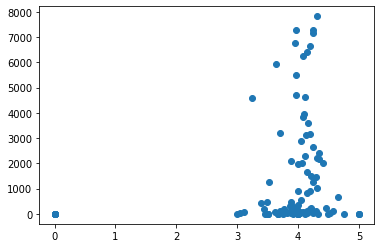

In [ ]:
plt.scatter(xs,ys)

In [ ]:
from sklearn.cluster import KMeans
ks=range(1,6)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(samples)
    inertia=model.inertia_
    inertias.append(inertia)
    
inertias    

[462898280.62320095,
 95095706.98611939,
 31086149.68598505,
 15098743.416602124,
 9972895.260626325]

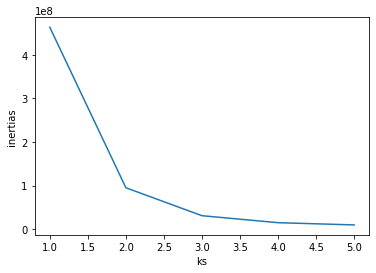

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ks, inertias);
plt.xlabel('ks');
plt.ylabel('inertias');

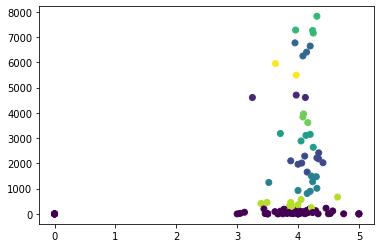

In [ ]:
model2=KMeans(n_clusters=10)
model2.fit(samples)
labels=model2.predict(samples)

labels
xs=samples.iloc[:,0]
ys=samples.iloc[:,1]
plt.scatter(xs,ys,c=labels)


In [ ]:
samples['label'] = model2.labels_
samples.head()

,avg_rating,no_of_ratings,label
0,4.25,7156.0,6
1,4.31,7821.0,6
2,4.08,3836.0,7
3,3.52,1245.0,4
4,4.13,3107.0,5


In [ ]:
new_df['label'] = model2.labels_
new_df.head()

,level_0,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned,label
0,0,0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in...",Biographies & Memoirs,Jeannette Walls,4.25,7156.0,tender moving tale unconditional love family t...,6
1,1,1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi...",Biographies & Memoirs,Elie Wiesel,4.31,7821.0,born jewish ghetto hungary child elie wiesel s...,6
2,2,2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...,Biographies & Memoirs,Frank McCourt,4.08,3836.0,imbued every page frank mccourt s astounding h...,7
3,3,3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an...",Biographies & Memoirs,Elizabeth Gilbert,3.52,1245.0,celebrated writer s irresistible candid eloque...,4
4,4,4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...,Biographies & Memoirs,Jon Krakauer,4.13,3107.0,bank clouds assembling not so distant horizon ...,5


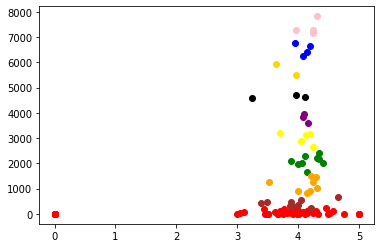

In [ ]:
filtered_label0 = samples[samples['label'] == 0]
filtered_label1 = samples[samples['label'] == 1]
filtered_label2 = samples[samples['label'] == 2]
filtered_label3 = samples[samples['label'] == 3]
filtered_label4 = samples[samples['label'] == 4]
filtered_label5 = samples[samples['label'] == 5] 
filtered_label6 = samples[samples['label'] == 6] 
filtered_label7 = samples[samples['label'] == 7] 
filtered_label8 = samples[samples['label'] == 8] 
filtered_label9 = samples[samples['label'] == 9] 



#Plotting the results 
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black') 
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'green') 
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'blue') 
plt.scatter(filtered_label4.iloc[:,0] , filtered_label4.iloc[:,1] , color = 'orange') 

plt.scatter(filtered_label5.iloc[:,0] , filtered_label5.iloc[:,1] , color = 'yellow') 
plt.scatter(filtered_label6.iloc[:,0] , filtered_label6.iloc[:,1] , color = 'pink') 
plt.scatter(filtered_label7.iloc[:,0] , filtered_label7.iloc[:,1] , color = 'purple')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'brown')
plt.scatter(filtered_label9.iloc[:,0] , filtered_label9.iloc[:,1] , color = 'Gold') 
plt.show()

In [ ]:
sa = new_df[new_df['label'] != 0]
len(sa)

47

In [ ]:
len(new_df)

102

In [ ]:
new_df[new_df['name'] == 'Fantasy League']

,level_0,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned,label
56,56,56,3828.0,Fantasy League,12-year-old Charlie is a fantasy football guru...,Children's Books,Mike Lupica,4.2,897.0,12 year old charlie fantasy football guru may ...,4


# Recommendations based on clusters

In [ ]:
#Recommending top 5 similar books

def recommendations(title):    

    #Reverse mapping of the index
    indices = pd.Series(new_df.index, index = new_df['name']).drop_duplicates()
    idx = indices[title]
    print('Index: ', idx)
    idc = sa.index.to_list()


    if idx in idc:
      val1 = idc.index(idx)
    else:
      idc.append(idx)
      val1 = -1
    
    
    print('Genre: ', new_df['genre'][idx])
    temp = [tfidf_vectors[i] for i in idc]
    
    # finding cosine similarity for the vectors
    cosine_similarities = cosine_similarity(temp,  temp)

    # Considering book genre             
    
    print(idc)
    for i in idc:
      if new_df.iloc[i]['genre'] != new_df['genre'][idx]:
        cosine_similarities[val1][idc.index(i)] /= 2    
   
    print(cosine_similarities[val1])
    books = sa['name']
    sim_scores = list(enumerate(cosine_similarities[val1]))
    print('Len = ', len(cosine_similarities))
    sim_scores = sorted(sim_scores,
    key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    print(sim_scores)

    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    return recommend

In [ ]:
rec = recommendations("Fantasy League")
rec

Index:  56
Genre:  Children's Books
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 35, 38, 43, 46, 50, 56, 65, 69, 71, 72, 73, 84, 92, 96, 97, 99, 100, 101]
[0.21177834 0.20001858 0.17266715 0.20152482 0.10241475 0.30910656
 0.22901009 0.31199259 0.25638371 0.19465173 0.22794465 0.21563228
 0.18505762 0.20645417 0.24001444 0.2279262  0.24194148 0.27595504
 0.15556077 0.20151608 0.15003234 0.20392815 0.23606414 0.18367598
 0.24809855 0.20853284 0.3146471  0.27811698 0.20567881 0.13594937
 0.40192705 0.21068109 0.17324767 0.22660658 1.         0.4095146
 0.01876397 0.18605145 0.14296587 0.16649306 0.28059517 0.13009843
 0.41346427 0.21720436 0.21358328 0.06095063 0.14587713]
Len =  47
[(42, 0.41346426878435605), (35, 0.40951459924959965), (30, 0.40192704597018414), (26, 0.3146471005126905), (7, 0.311992594595073)]


96    Beyond Courage: The Untold Story of Jewish Res...
65                                             Shortcut
38                                   A Handful of Stars
26                                          Bossypants 
7                                        Into the Wild 
Name: name, dtype: object

In [ ]:
list_of_indexes = rec.index.to_list()
test = new_df.iloc[list_of_indexes]
test

,level_0,index,book_id,name,description,genre,author,avg_rating,no_of_ratings,cleaned,label
96,116,116,2441.0,Beyond Courage: The Untold Story of Jewish Res...,"Under the noses of the military, Georges Loing...",Children's Books,Doreen Rappaport,4.15,809.0,noses military georges loinger smuggles thousa...,4
65,65,65,322.0,Shortcut,The train tracks ran right by Bigmama's house ...,Children's Books,Donald Crews,4.00,362.0,train tracks ran right bigmama s house cottond...,8
38,38,38,3196.0,A Handful of Stars,This powerful middle-grade novel from the Newb...,Children's Books,Cynthia Lord,4.16,3611.0,powerful middle grade novel newbery honor auth...,7
26,26,26,4414.0,Bossypants,"Before Liz Lemon, before ""Weekend Update,"" bef...",Biographies & Memoirs,Tina Fey,3.95,6768.0,liz lemon weekend update sarah palin tina fey ...,3
7,7,7,3190.0,Into the Wild,In April 1992 a young man from a well-to-do fa...,Biographies & Memoirs,Jon Krakauer,3.96,7275.0,april 1992 young man well to do family hitchhi...,6
